In [1]:
import os
os.chdir('drive/My Drive/Cognitive Vigilance/')
!pwd

/content/drive/My Drive/Cognitive Vigilance


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [0]:
_header = ["article_text", "event_location", "average_tone", "article_date", "article_ID", "article_URL", "MBFC_factuality_label", "article_URL", "MBFC_factuality_label", "URL_to_MBFC_page", "source_name", "MBFC_notes_about_source", "MBFC_bias_label", "source_URL", "propaganda_label"]
train_dataset = pd.read_csv("proppy_1.0.train.tsv", sep="\t", header=None)
dev_dataset = pd.read_csv("proppy_1.0.dev.tsv", sep="\t", header=None)
test_dataset = pd.read_csv("proppy_1.0.test.tsv", sep="\t", header=None)
train_dataset.columns, dev_dataset.columns, test_dataset.columns = _header, _header, _header

In [44]:
print(train_dataset['article_text'][0])

Et tu, Rhody?  A recent editorial in the Providence Journal cataloged everything it could find wrong with Connecticut and ended with this suggestion: “Gov. Gina Raimondo should see if at least some of those jobs could come to Rhode Island. It is certainly less risky than the Nutmeg State.”  We beg your pardon.  The state with world-famous pension problems and persistent economic issues of its own is “less risky”?  The Journal itself reported just a few weeks ago on Rhode Island’s own significant economic problems, which in many ways reflect Connecticut’s.  Rhode Island enjoys a legacy of corruption that not even Connecticut can match. The ProJo won a Pulitzer Prize in 1994 for uncovering widespread corruption within its own court system.  What, exactly, is to be gained from moving to Rhode Island?  Like Connecticut, Rhode Island has an income tax and an estate tax with comparable rates. (Forbes magazine listed it as one of the states “Where Not To Die.” Connecticut made the list, too.)

Train Dataset Length :  35986
Dev Dataset Length :  5125
Test Dataset Length :  10159


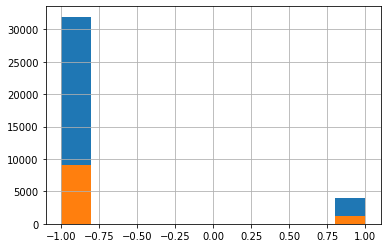

In [41]:
print("Train Dataset Length : ", len(train_dataset))
print("Dev Dataset Length : ", len(dev_dataset))
print("Test Dataset Length : ", len(test_dataset))
train_dataset['propaganda_label'].hist()
test_dataset['propaganda_label'].hist()

In [0]:
X_train = train_dataset['article_text']
Y_train = train_dataset['propaganda_label']
X_dev = dev_dataset['article_text']
Y_dev = dev_dataset['propaganda_label']
X_test = test_dataset['article_text']
Y_test = test_dataset['propaganda_label']

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=True)
cv.fit(X_train)
XTR = cv.transform(X_train)
XD = cv.transform(X_dev)
XT = cv.transform(X_test)

In [29]:
XTR.shape

(35986, 177589)

**Building Classifier** using Logistic Regression [Fine-tuning on various learning rates]

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(C=c, max_iter = 10000)
    lr.fit(XTR, Y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(Y_dev, lr.predict(XD))))

Accuracy for C=0.01: 0.9596097560975609
Accuracy for C=0.05: 0.9633170731707317
Accuracy for C=0.25: 0.9642926829268292
Accuracy for C=0.5: 0.9629268292682926
Accuracy for C=1: 0.9623414634146341


**Train Final Model** : Best learning rate 0.25

In [34]:
final_model = LogisticRegression(C=0.25, max_iter = 10000)
final_model.fit(XTR, Y_train)
print ("Final Accuracy: %s" 
       % accuracy_score(Y_test, final_model.predict(XT)))

Final Accuracy: 0.9622994389211537


**Accuracy Analysis**

In [40]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
print("Train Accuracy Analysis")
print("--------------------------------------------------------------------")
results = confusion_matrix(Y_train, final_model.predict(XTR)) 
print ("Confusion Matrix :")
print (results) 
print ("Final Accuracy: %s" % accuracy_score(Y_train, final_model.predict(XTR)))
print ('Report : ')
print (classification_report(Y_train, final_model.predict(XTR)))

print("Test Accuracy Analysis")
print("--------------------------------------------------------------------")
results = confusion_matrix(Y_test, final_model.predict(XT)) 
print ("Confusion Matrix :")
print (results) 
print ("Final Accuracy: %s" % accuracy_score(Y_test, final_model.predict(XT)))
print ('Report : ')
print (classification_report(Y_test, final_model.predict(XT)))

Train Accuracy Analysis
--------------------------------------------------------------------
Confusion Matrix :
[[31965     0]
 [   27  3994]]
Final Accuracy: 0.9992497082198633
Report : 
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     31965
           1       1.00      0.99      1.00      4021

    accuracy                           1.00     35986
   macro avg       1.00      1.00      1.00     35986
weighted avg       1.00      1.00      1.00     35986

Test Accuracy Analysis
--------------------------------------------------------------------
Confusion Matrix :
[[8897  122]
 [ 261  879]]
Final Accuracy: 0.9622994389211537
Report : 
              precision    recall  f1-score   support

          -1       0.97      0.99      0.98      9019
           1       0.88      0.77      0.82      1140

    accuracy                           0.96     10159
   macro avg       0.92      0.88      0.90     10159
weighted avg       0.96      0